In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
%matplotlib inline

titanic = pd.read_csv('titanic.csv')

In [2]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


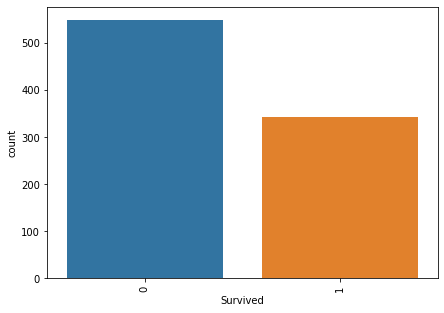

In [3]:
titanic['Survived'].value_counts().plot(kind= 'bar', figsize=(7,5))
sns.countplot(x='Survived', data=titanic)

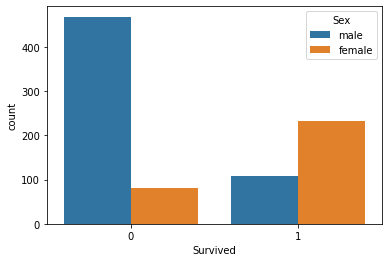

In [4]:
sns.countplot(x='Survived', hue='Sex', data=titanic)

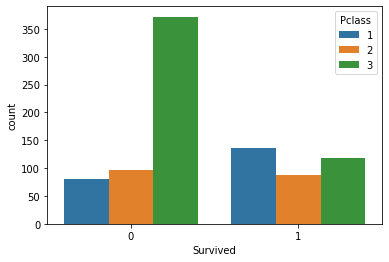

In [5]:
sns.countplot(x='Survived', hue='Pclass', data=titanic)

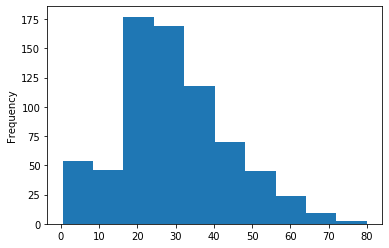

In [6]:
titanic['Age'].plot.hist()

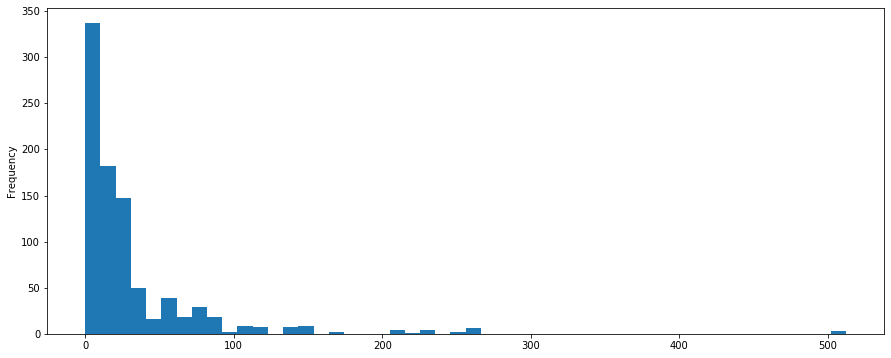

In [7]:
titanic['Fare'].plot.hist(bins=50, figsize=(15,6))

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


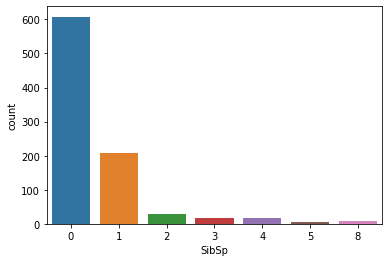

In [9]:
sns.countplot(x='SibSp', data=titanic)

In [10]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

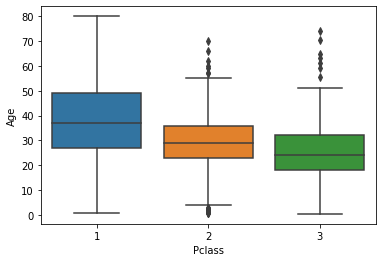

In [11]:
sns.boxplot(x='Pclass', y= 'Age', data=titanic)

In [12]:
titanic.dropna(inplace=True)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [15]:
embark=pd.get_dummies(titanic['Embarked'], drop_first=True)
embark.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [16]:
Pclass=pd.get_dummies(titanic['Pclass'], drop_first=True)
Pclass.head()

,2,3
1,0,0
3,0,0
6,0,0
10,0,1
11,0,0


In [17]:
titanic = pd.concat([titanic,sex,embark,Pclass], axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,0,1,0,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1,0,0


In [20]:
titanic.drop(['Sex','Embarked','PassengerId','Name','Ticket'], axis=1, inplace=True)

In [21]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,1,1,38.0,1,0,71.2833,C85,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,C123,0,0,1,0,0
6,0,1,54.0,0,0,51.8625,E46,1,0,1,0,0
10,1,3,4.0,1,1,16.7000,G6,0,0,1,0,1
11,1,1,58.0,0,0,26.5500,C103,0,0,1,0,0


In [22]:
titanic.drop(['Pclass'],axis=1,inplace=True)

In [23]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,male,Q,S,2,3
1,1,38.0,1,0,71.2833,C85,0,0,0,0,0
3,1,35.0,1,0,53.1000,C123,0,0,1,0,0
6,0,54.0,0,0,51.8625,E46,1,0,1,0,0
10,1,4.0,1,1,16.7000,G6,0,0,1,0,1
11,1,58.0,0,0,26.5500,C103,0,0,1,0,0


In [35]:
titanic.drop(['Cabin'], axis=1, inplace=True)

In [36]:
x = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [27]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [38]:
logmodel.fit(x_train, y_train)

C:\Users\NumoStanley\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions = logmodel.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,predictions)

0.717391304347826